**Table of contents**<a id='toc0_'></a>    
- [Optimization via Stochastic Gradient Descent](#toc1_)    
  - [Stochastic GD Algorithm](#toc1_1_)    
  - [SGD Testing](#toc1_2_)    
    - [Logistic regression implementation](#toc1_2_1_)    
  - [Testing logistic classificator](#toc1_3_)    
    - [Data preparation](#toc1_3_1_)    
    - [Accuracy Matrix](#toc1_3_2_)    
      - [Different training sizes](#toc1_3_2_1_)    
  - [Comparing SGD with GD](#toc1_4_)    
    - [GD Accuracy](#toc1_4_1_)    
    - [Comparing execution time](#toc1_4_2_)    
    - [Comparing errors](#toc1_4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

#  [&#8593;](#toc0_) <a id='toc1_'></a>Optimization via Stochastic Gradient Descent

While working with Machine Learning (ML) you are usually given a dataset $\mathbb{D} = {X, Y }$ with

$$ X = [x^1 x^2 \dots x^N ] \in \mathbb{R}^{d\times N} $$
and
$$ Y = [y^1 y^2 \dots y^N ] \in \mathbb{R}^N $$

and a parametric function $f_w(x)$ where the vector $w$ is usually referred to as the weights of the model. The training procedure can be written as:

$$ w^{*} = \arg \underset{w}{\min}   ℓ(w; \mathbb{D}) = \arg \underset{w}{\min} \sum_{i=1}^{N} ℓ_i(w; x^i, y^i) $$

what is interesting from the optimization point of view, is that the objective function $ℓ(w; \mathbb{D})$ is written as a sum of independent terms that are related to datapoints (we will see in the next lab why this formulation is so common).

Suppose we want to apply GD to $w^{*}$. Given an initial vector $w_0 \in \mathbb{R}^n$, the iteration become:

$$ w_{k+1} = w_{k} - \alpha_k ∇_w ℓ(w_k; \mathbb{D}) = w_{k} - \alpha_k \sum_{i=1}^{N}∇_w ℓ_i(w; x^i, y^i)$$

Thus, to compute the iteration we need the gradient with respect to the weights of the objective functions, that can be computed by summing up the gradients of the independent functions $ℓ_i(w; x^i, y^i)$.

Unfortunately, even if it is easy to compute the gradient for each of the $ℓ_i(w; x^i, y^i)$, when the number of samples $N$ is large (which is common in Machine Learning), the computation of the full gradient $∇_w ℓ(w_k; \mathbb{D})$ is prohibitive. For this reason, in such optimization problems, instead of using a standard GD algorithm, it is better using the Stochastic Gradient Descent (SGD) method. That is a variant of the classical GD where, instead of computing $∇_w ℓ(w; \mathbb{D}) = \sum_{i=1}^{N} ∇_w ℓ_i(w; x^i, y^i)$, the summation is reduced to a limited number of terms, called a batch. The idea is the following:

- Given a number $N_{batch}$ (usually called batch size), randomly extract a subdataset $\mathbb{M}$ with $|\mathbb{M}| = N_{batch}$ from $\mathbb{D}$.

- Approximate the true gradient $∇_w ℓ(w; \mathbb{D}) = \sum_{i=1}^{N} ∇_w ℓ_i(w; x^i, y^i)$ with $∇_w ℓ(w; \mathbb{M}) = \sum_{i \in \mathbb{M}} ∇_w ℓ_i(w; x^i, y^i)$.

- Compute one single iteration of the GD algorithm $w_{k+1} = w_k − \alpha_k ∇_w ℓ(w; \mathbb{M})$

- Repeat until you have extracted the full dataset. Notice that the random sampling at each iteration
is done without replacement.

Each iteration of the algorithm above is usually called batch iteration. When the whole dataset has been
processed, we say that we completed an epoch of the SGD method. This algorithm should be repeated for a
fixed number $E$ of epochs to reach convergence.

Unfortunately, one of the biggest drawbacks of SGD with respect to GD, is that now we cannot check the
convergence anymore (since we can’t obviously compute the gradient of $ℓ(w; \mathbb{D})$ to check its distance from zero) and we can’t use the backtracking algorithm, for the same reason. As a consequence, the algorithm will stop ONLY after reaching the fixed number of epochs, and we must set a good value for the step size $\alpha_k$ by hand. Those problems are solved by recent algorithms like SGD with Momentum, Adam, AdaGrad, $\dots$

##  [&#8593;](#toc0_) <a id='toc1_1_'></a>Stochastic GD Algorithm

Write a Python script that implement the SGD algorithm, following the structure you already wrote
for GD. That script should work as follows:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
VERBOSITY = 0

Gradient descend algorithm from previous exercise

In [3]:
DIVERGE_THRESHOLD = 1e+10
"""
Returns the following values:
    x: ndarray. Array of iterate.
    k: int. Number of iterations.
    f_val: ndarray. Array of f(x) values.
    grads: ndarray. Array of gradient values.
    err: ndarray. Array of error values.
    converge: bool. True if the method converges, False otherwise.
"""
def GD(f, grad_f, x0, X, Y, kmax:int=1000, tolf:float=1e-6, tolx:float=1e-6, alpha:float=0.1):
    # x, f_val, grads, err = np.zeros((kmax, len(x0))), np.zeros((kmax, )), np.zeros((kmax, 785)), np.zeros((kmax, ))
    x, f_val, grads, err = [],[],[],[]

    # Setting the initial values because the for cycle skips the index 0
    x.append(np.reshape(x0, (785,)))
    f_val.append(f(x0,X.T,Y))
    grads.append(grad_f(x0,X.T,Y))
    err.append(np.linalg.norm(grads[0],2))

    for k in (tqdm(range(1,kmax), desc=f'GD') if VERBOSITY==1 else range(1,kmax)):
        # Update the x value iterativly and saves the last value
        x.append(x[k-1] - (alpha*grad_f(x[k-1],X.T,Y)).T)
        if sum(x[k] > DIVERGE_THRESHOLD) > 0:
            if VERBOSITY==1:
                print('Diverging')
            return x[:k],k,f_val[:k],grads[:k],err[:k],False
        
        # Adding the values to be returned
        f_val.append(f(x[k],X.T,Y))
        grads.append(grad_f(x[k],X.T,Y).flatten())
        err.append(np.linalg.norm(grads[k],2))
        if sum(grads[k] > DIVERGE_THRESHOLD) > 0:
            if VERBOSITY==1:
                print('Diverging')
            return x[:k+1],k,f_val[:k+1],grads[:k+1],err[:k+1],False
        

        # Check the stop condition
        if np.linalg.norm(grad_f(x[k],X.T,Y),2) < tolf * np.linalg.norm(grad_f(x0,X.T,Y),2):
            if VERBOSITY==1:
                print('Stopping for function tolerance')
            return x[:k+1],k,f_val[:k+1],grads[:k+1],err[:k+1],True
        if np.linalg.norm(x[k] - x[k-1],2) < tolx:
            if VERBOSITY==1:
                print('Stopping for x tolerance')
            return x[:k+1],k,f_val[:k+1],grads[:k+1],err[:k+1],True
        
    if VERBOSITY==1:
        print('Reached max iterations')
    return x,kmax-1,f_val[:k+1],grads[:k+1],err[:k+1],True

In [4]:
"""
Input:
    l: the function l(w; D) we want to optimize. It is supposed to be a Python function, not an array.
    grad_l: the gradient of l(w; D). It is supposed to be a Python function, not an array.
    w0: an n-dimensional array which represents the initial iterate. By default, it should be randomly sampled.
    data: a tuple (x, y) that contains the two arrays x and y, where x is the input data, y is the output data.
    batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data.
    n_epochs: an integer. The number of epochs you want to reapeat the iterations.
Output:
    w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter).
    f_val: an array that contains the value of l(w_k; D)
        FOR EACH iterate w_k ONLY after each epoch.
    grads: an array that contains the value of grad_l(w_k; D)
        FOR EACH iterate w_k ONLY after each epoch.
    err: an array the contains the value of ||grad_l(w_k; D)||_2
        FOR EACH iterate w_k ONLY after each epoch
"""

def SGD(l, grad_l, w0, data, batch_size: int = 100, n_epochs: int = 3):
    alpha = 0.03
    X,Y = data
    N = len(Y)
    # Creating the return values
    w, f_val, grads, err = np.zeros((N * n_epochs,len(w0))), np.zeros((n_epochs,)), np.zeros((n_epochs,785)), np.zeros((n_epochs,))
    w[0] = np.reshape(w0, (785,))
    k = 0
    for epoch in (tqdm(range(n_epochs), desc=f'SGD') if VERBOSITY==1 else range(n_epochs)):
    # for epoch in range(n_epochs):
        indices = np.arange(len(Y))
        
        # Shuffle the indices
        np.random.shuffle(indices)
        while len(indices) > 0:
            indices_batch = indices[:batch_size]
            X_batch = X[indices_batch]
            Y_batch = Y[indices_batch]
            # Update the w value using the gradient calculated only on the batch
            w[k + 1] = w[k] - alpha * grad_l(w[k],X_batch.T,Y_batch)
            k += 1
            # Remove the used indices
            indices = indices[batch_size:]
        # Adding the return values
        f_val[epoch] = l(w[k], X.T, Y)
        grads[epoch] = grad_l(w[k], X.T, Y)
        err[epoch] = np.linalg.norm(grads[epoch],2)
    
    return w, f_val, grads, err,k

##  [&#8593;](#toc0_) <a id='toc1_2_'></a>SGD Testing

To test the script above, consider the MNIST dataset we used in the previous laboratories, and do the following:

1. From the dataset, select only two digits. It would be great to let the user input the two digits to select.
2. Do the same operation of the previous homework to obtain the training and test set from (X, Y ), selecting the $N_{train}$ you prefer.
3. Consider Lecture $11$ on my website about the implementation of Logistic Regression for binary classification https://www.evangelistadavide.com/teaching/logistic_regression2024/. It has not been described in class, but it is equivalent to Linear Regression with a slightly modified model. After carefully reading the post, implement a logistic regression classificator.

###  [&#8593;](#toc0_) <a id='toc1_2_1_'></a>Logistic regression implementation

Definition of all the function needed to implement the logistic regressor as explained in  https://www.evangelistadavide.com/teaching/logistic_regression2024/

In [5]:
# Define sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x/40000))

def f(w, xhat):
    #print(xhat.T.shape, w.shape)
    return sigmoid(xhat.T @ w)

# Value of the loss
def ell(w, X, Y):
    N = len(X)
    return (1/(2*N)) * np.linalg.norm(f(w, X) - Y,2)
    
# Value of the gradient
def grad_ell(w, X, Y):
    N = len(X)
    a = sigmoid(X.T @ w)
    b = 1 - a
    c = f(w, X) - Y
    return (X / N) @ (a * b * c)

Definition of the algorithm with parameters to control the use of SGD, the number of epochs and the batch size.

In [6]:
"""
X: the entire dataset
Y: the labels of the dataset
"""
def logistic_classificator(X,Y, ell, grad_ell, a:int, b:int, training_perc:float, w0 = None, use_SGD: bool = True, n_epochs:int = 50, batch_size:int = 100, k_max:int = 100):
    # Extract the datapoints and the labels of a and b
    X = X[(Y == a) | (Y == b)]
    Y = Y[(Y == a) | (Y == b)]
    # Transform the labels of Y from a,b to 0,1
    Y = (Y - a) / (b-a)
    # Split the dataset in train set and test set
    training_num = int(len(X) * training_perc)

    X_train, Y_train = X[:training_num], Y[:training_num] 
    X_test, Y_test = X[training_num:], Y[training_num:]

    N,d = X_train.shape
    #print(X_train.shape)
    Xhat = np.concatenate((np.zeros((N,1)), X_train), axis=1)
    # Set the initial value for the weights
    if w0 is None:
        w0 = np.ones((d + 1,1))
        
    if use_SGD:
        w, f_val, grads, err, k = SGD(ell, grad_ell, w0, (Xhat,Y_train), n_epochs=n_epochs, batch_size=batch_size)
    else:
        w,k,f_val,grads,err,_ =  GD(ell, grad_ell, w0, Xhat,Y_train, kmax=k_max)    
    # Get the weights of the last epoch 
    best_weights = w[k]
    # Test the accuracy on the test set
    acc = accuracy(best_weights, X_test, Y_test) 
    
    return acc, w[k], f_val, grads, err

# Returns a number between 0 and 1
# The closer the number is to 0 or 1, higher is the confidence of the prediction
def predict(weights, x):
    return f(weights.T, x)

def accuracy(weights, X, Y):
    N,d = X.shape
    X = np.concatenate((np.zeros((N,1)), X), axis=1)
    correct = sum([(1 if predict(weights,X[i]) > 0.5 else 0) == Y[i] for i in range(len(X))])
    return correct / len(Y)


##  [&#8593;](#toc0_) <a id='toc1_3_'></a>Testing logistic classificator

###  [&#8593;](#toc0_) <a id='toc1_3_1_'></a>Data preparation

The first column of the dataset contains the labels.

In [7]:
X = np.array(pd.read_csv('./data.csv'))
m,n = 28,28
Y = X[:,0]
X = X[:,1:]

Testing the accuracy of the logistic classificator using the digits $(5,6)$

Accuracy for the classification of the pair (5,6) = 0.9660045836516424


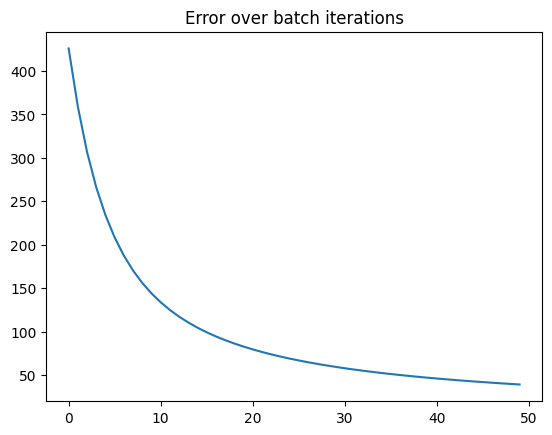

In [8]:
# Filter only two labels
a,b = 5,6
training_perc = 0.67

acc, w, f_val, grads, err = logistic_classificator(X,Y,ell,grad_ell, a, b, training_perc=training_perc)
print(f'Accuracy for the classification of the pair ({a},{b}) = {acc}')
plt.title(f'Error over batch iterations')
plt.plot(err);

###  [&#8593;](#toc0_) <a id='toc1_3_2_'></a>Accuracy Matrix

Now let's calculate the accuracy of the logistic regressor between each pair building a matrix defined as:

$$ a_{i,j} = \text{accuracy}(i,j) $$

In [9]:
def calculate_accuracy_matrix(X,Y, ell, grad_ell, training_perc: float, use_SGD:bool = True):
    accuracy_matrix = np.zeros((10,10))
    for a in (tqdm(range(10), desc=f'Accuracy matrix with training_perc={training_perc}') if VERBOSITY==1 else range(10)):
        for b in range(10):
            if a != b:
                if accuracy_matrix[b,a] != 0:
                    # We already calculated this pair
                    accuracy_matrix[a,b] = accuracy_matrix[b,a]
                else:
                    acc, w, f_val, grads, err = logistic_classificator(X,Y,ell,grad_ell, a, b, training_perc, use_SGD=use_SGD) 
                    accuracy_matrix[a,b] = acc
            else:
                accuracy_matrix[a,b] = 1
    return accuracy_matrix

Here we calculate the accuracy matrix for a training size of $50\%$

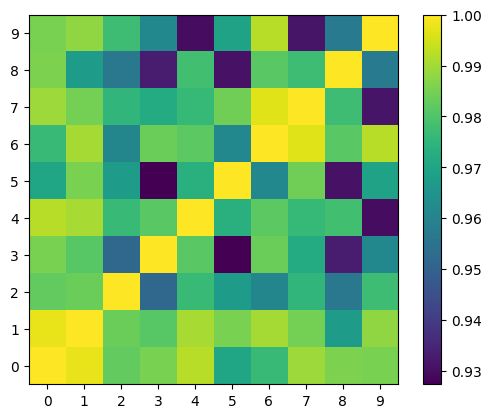

In [10]:
accuracy_matrix = calculate_accuracy_matrix(X,Y,ell, grad_ell, training_perc=0.5)
plt.imshow(accuracy_matrix)
plt.gca().invert_yaxis()
plt.colorbar()
plt.locator_params(nbins=10)
plt.show()

In [11]:
print(f'Average accuracy = {np.average(accuracy_matrix)}')

Average accuracy = 0.975614021306754


**The lowest accuracy is about $0.93$, and this happends only for similar digits like $(7,9)$ or $(5,3)$.**

**The average accuracy is $0.976$ so I think that's a pretty good result.**

####  [&#8593;](#toc0_) <a id='toc1_3_2_1_'></a>Different training sizes

Now we calculate the accuracy matrix using the following values for the training size $[20\%,50\%,67\%,90\%]$

**Disable tqmd in SGD for the execution of this code if you don't want to do a mess**

In [12]:
training_percs = [0.2,0.5,0.67,0.9]
accuracy_matrices = []
for i,training_perc in enumerate(training_percs):
    accuracy_matrices.append(calculate_accuracy_matrix(X,Y,ell, grad_ell, training_perc=training_perc))
    

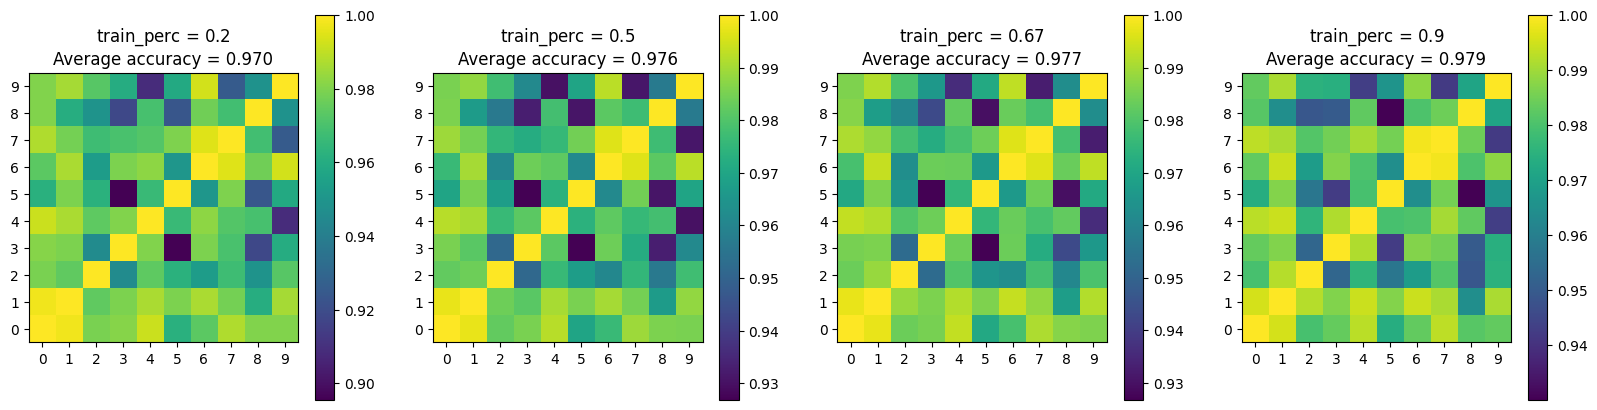

In [20]:
plt.figure(figsize=(20,5))
for i,accuracy_matrix in enumerate(accuracy_matrices):
    plt.subplot(1,len(accuracy_matrices),i+1)
    plt.title(f'train_perc = ${training_percs[i]}$\nAverage accuracy = {np.average(accuracy_matrix):.3f}')
    plt.imshow(accuracy_matrix)
    plt.gca().invert_yaxis()
    plt.locator_params(nbins=10)
    plt.colorbar()
plt.show()

##  [&#8593;](#toc0_) <a id='toc1_4_'></a>Comparing SGD with GD

###  [&#8593;](#toc0_) <a id='toc1_4_1_'></a>GD Accuracy

Here we compare the optimal parameters $w^*$ computed using SGD and using GD, for different digits and different training set dimensions.

Accuracy for the classification of the pair (5,6) = 0.9697478991596639


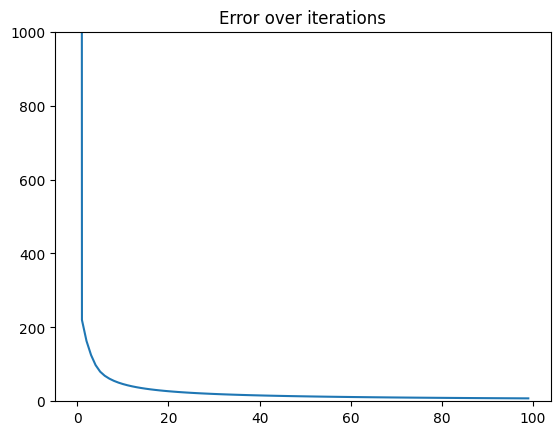

In [14]:
# Filter only two labels
a,b = 5,6
training_perc = 0.40

acc, w, f_val, grads, err = logistic_classificator(X,Y,ell,grad_ell, a, b, training_perc=training_perc, use_SGD=False, k_max=100)
print(f'Accuracy for the classification of the pair ({a},{b}) = {acc}')
plt.title(f'Error over iterations')
plt.ylim(top=1000)
plt.plot(err);

The accuracy results for the GD are good too, but the main difference is in the execution time.

**Building an accuracy matrix will take too much computational time.**

###  [&#8593;](#toc0_) <a id='toc1_4_2_'></a>Comparing execution time

In [ ]:
import time
def compare_execution_times(training_percs):
    times_SGD, times_GD = [],[]
    for training_perc in training_percs:
        start = time.time()
        acc_SGD, w_SGD, f_val_SGD, grads_SGD, err_SGD = logistic_classificator(X,Y,ell,grad_ell, a, b, training_perc=training_perc, use_SGD=True, k_max=100)
        times_SGD.append(time.time() - start)
        start = time.time()
        acc_GD, w_GD, f_val_GD, grads_GD, err_GD = logistic_classificator(X,Y,ell,grad_ell, a, b, training_perc=training_perc, use_SGD=False, k_max=100)
        times_GD.append(time.time() - start)
    return times_GD, times_SGD

training_percs = [0.2,0.5,0.67,0.9]
times_GD, times_SGD = compare_execution_times(training_percs)

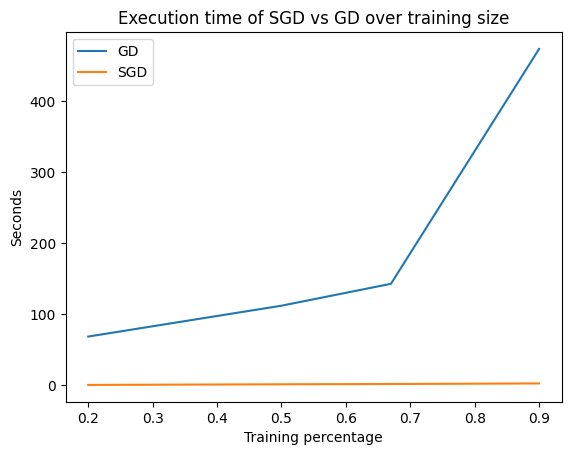

In [ ]:
plt.plot(training_percs, times_GD, label='GD')
plt.plot(training_percs, times_SGD, label='SGD')
plt.title(f'Execution time of SGD vs GD over training size')
plt.legend(loc='upper left')
plt.ylabel('Seconds')
plt.xlabel('Training percentage')
plt.show()

###  [&#8593;](#toc0_) <a id='toc1_4_3_'></a>Comparing errors

In [ ]:
a,b = 5,6
training_perc = 0.40

# SGD
acc_SGD, w_SGD, f_val_SGD, grads_SGD, err_SGD = logistic_classificator(X,Y,ell,grad_ell, a, b, training_perc=training_perc, use_SGD=True, k_max=100)
# GD
acc_GD, w_GD, f_val_GD, grads_GD, err_GD = logistic_classificator(X,Y,ell,grad_ell, a, b, training_perc=training_perc, use_SGD=False, k_max=100)

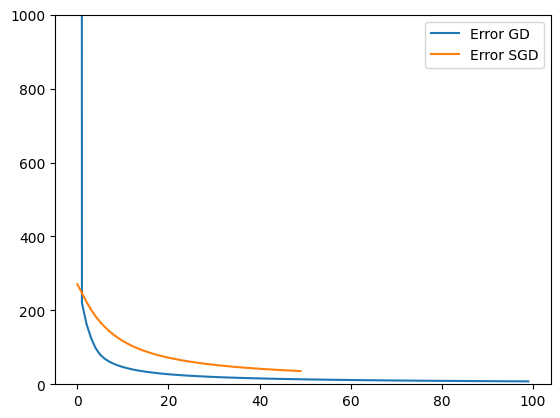

In [ ]:
plt.plot(err_GD, label='Error GD')
plt.plot(err_SGD, label='Error SGD')
plt.legend(loc='upper right')
plt.ylim(top=1000,bottom=0)
plt.show()

**As we can see, even if at the beginning the error is greater with GD, it gets lower of the error of the SGD. This is compatible with the theory because SGD is an approximated method, that doesn't calculate the exact gradient, so it's predictable that it's error compared with the GD one will be greater.**

**The main advantage of the SGD, as pointed before, is the execution time, that is 2 order of magnitude less compared with GD.**